In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [3]:
import matplotlib.cm as cm
import math
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 설정합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플의 산점도를 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl, 
                    edgecolor='black')

In [4]:
pit = pd.read_excel('df_hit_2(수정).xlsx')
pit.head(10)

,Unnamed: 0,player_team,player_AVG,player_G,player_PA,player_AB,player_RH,player_HH,player_2B,player_3B,...,player_SB,player_CS,player_BBH,player_HBPH,player_SOH,player_GDP,player_SLG,player_OBP,player_E,mvp
0,0,0.714286,0.661871,1.000000,1.000000,1.000000,1.000000,1.000000,0.884615,0.444444,...,0.461538,0.5000,0.330275,0.166667,0.376712,0.529412,0.326146,0.398148,0.28,0
1,1,0.571429,0.683453,1.000000,0.955556,0.837423,0.764045,0.868421,0.961538,0.444444,...,0.115385,0.2500,0.660550,0.250000,0.267123,0.588235,0.566038,0.625000,0.52,0
2,2,0.714286,0.482014,0.940299,0.925000,0.711656,0.808989,0.649123,0.730769,0.222222,...,0.403846,0.4375,0.715596,0.125000,0.308219,0.705882,0.234501,0.574074,0.60,0
3,3,0.142857,0.431655,0.910448,0.908333,0.757669,0.932584,0.657895,0.923077,0.222222,...,0.076923,0.1250,0.715596,0.500000,0.794521,0.294118,0.757412,0.578704,0.16,1
4,4,0.285714,0.489209,0.910448,0.897222,0.837423,0.640449,0.754386,0.500000,0.333333,...,0.134615,0.4375,0.513761,0.083333,0.493151,0.647059,0.334232,0.416667,0.20,0
5,5,0.428571,0.856115,0.955224,0.880556,0.858896,0.865169,0.991228,0.538462,0.000000,...,0.288462,0.5625,0.385321,0.083333,0.410959,0.823529,0.630728,0.541667,0.24,0
6,6,0.000000,0.496403,0.940299,0.866667,0.911043,0.617978,0.815789,0.384615,0.333333,...,0.211538,0.2500,0.183486,0.125000,0.198630,0.705882,0.094340,0.226852,0.08,0
7,7,0.142857,0.446043,0.925373,0.841667,0.815951,0.842697,0.710526,0.769231,0.222222,...,0.538462,0.6875,0.293578,0.291667,0.445205,0.647059,0.469003,0.287037,0.20,0
8,8,0.142857,0.805755,1.000000,0.833333,0.779141,0.764045,0.885965,0.423077,0.000000,...,0.019231,0.0625,0.458716,0.208333,0.465753,0.705882,0.628032,0.592593,0.08,0
9,9,0.000000,0.647482,0.835821,0.830556,0.769939,0.865169,0.789474,0.538462,1.000000,...,1.000000,0.6875,0.486239,0.041667,0.253425,0.411765,0.212938,0.500000,0.24,0


In [5]:
data = pit.loc[:, ['player_HRH','player_TB']].to_numpy()    # 'player_ERA'
target = pit.loc[:, 'mvp']

print("종속변수 값 비율\n", target.value_counts())

# 데이터 분할
x_train, x_test, y_train, y_test = \
    train_test_split(data, target, test_size=0.3,
            random_state=2010061100, stratify=target)
    

종속변수 값 비율
 0    1415
1      10
Name: mvp, dtype: int64


훈련 정확도 0.9929789368104313
예측정확도 0.9929906542056075
[[425   0]
 [  3   0]]
정밀도 1.0
재현율 0.9929906542056075


C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


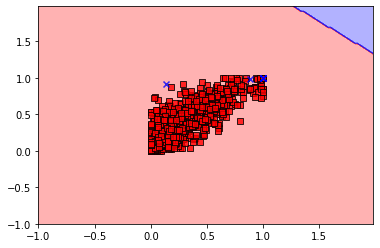

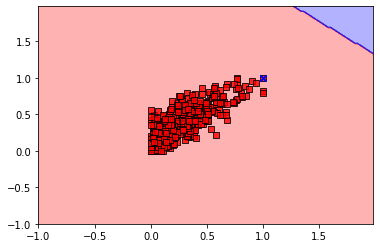

In [6]:
# 로지스틱 회귀

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

print('훈련 정확도', lr.score(x_train, y_train))

pred = lr.predict(x_test)

# 모델 평가
print('예측정확도', accuracy_score(pred, y_test))
print(confusion_matrix(y_test, pred))
print('정밀도', precision_score(pred, y_test, average='weighted'))
print('재현율', recall_score(pred, y_test, average='weighted'))

plot_decision_regions(x_train, y_train, lr)
plt.show()

plot_decision_regions(x_test, y_test, lr)
plt.show()

In [7]:
lr = LogisticRegression()
lr.fit(data, target)

print('훈련 정확도', lr.score(data, target))

print(confusion_matrix(target, lr.predict(data)))


훈련 정확도 0.9929824561403509
[[1415    0]
 [  10    0]]


훈련 정확도 0.995987963891675
예측정확도 0.9929906542056075
[[423   2]
 [  1   2]]
정밀도 0.992222833058457
재현율 0.9929906542056075


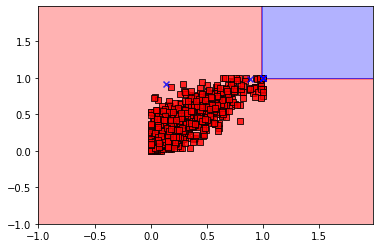

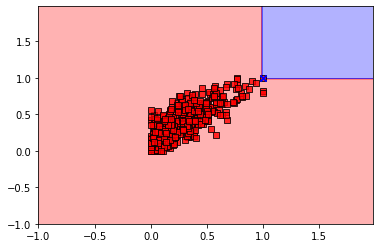

In [8]:
# 의사결정나무

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

print('훈련 정확도', dt.score(x_train, y_train))

pred = dt.predict(x_test)

# 모델 평가
print('예측정확도', accuracy_score(pred, y_test))
print(confusion_matrix(y_test, pred))
print('정밀도', precision_score(pred, y_test, average='weighted'))
print('재현율', recall_score(pred, y_test, average='weighted'))

plot_decision_regions(x_train, y_train, dt)
plt.show()

plot_decision_regions(x_test, y_test, dt)
plt.show()

In [9]:
dt = DecisionTreeClassifier()
dt.fit(data, target)

print('훈련 정확도', dt.score(data, target))

print(confusion_matrix(target, lr.predict(data)))

훈련 정확도 0.9964912280701754
[[1415    0]
 [  10    0]]


훈련 정확도 0.9929789368104313
예측정확도 0.9929906542056075
[[425   0]
 [  3   0]]
정밀도 1.0
재현율 0.9929906542056075


C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


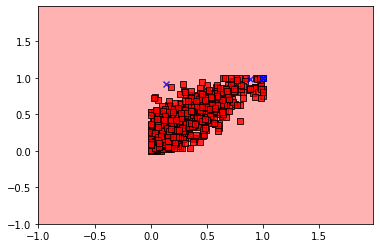

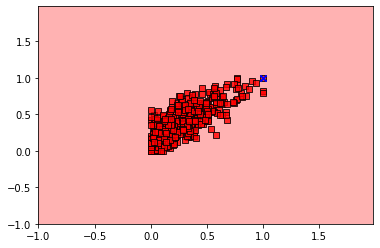

In [10]:
# 나이브 베이즈

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

bayes = BernoulliNB()
bayes.fit(x_train, y_train)
print('훈련 정확도', bayes.score(x_train, y_train))

pred = bayes.predict(x_test)

# 모델 평가
print('예측정확도', accuracy_score(pred, y_test))
print(confusion_matrix(y_test, pred))
print('정밀도', precision_score(pred, y_test, average='weighted'))
print('재현율', recall_score(pred, y_test, average='weighted'))

plot_decision_regions(x_train, y_train, bayes)
plt.show()

plot_decision_regions(x_test, y_test, bayes)
plt.show()

In [11]:
bayes = BernoulliNB()
bayes.fit(data, target)
print('훈련 정확도', bayes.score(data, target))

# 모델 평가
print(confusion_matrix(target, bayes.predict(data)))

훈련 정확도 0.9929824561403509
[[1415    0]
 [  10    0]]


훈련정확도 0.9929789368104313
예측정확도 0.9929906542056075
[[425   0]
 [  3   0]]
정밀도 1.0
재현율 0.9929906542056075


C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


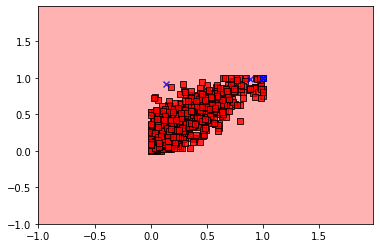

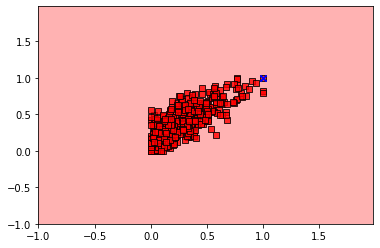

In [12]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

# knn 분석 : k=4
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

pred = knn.predict(x_test)

print('훈련정확도', knn.score(x_train, y_train))
print('예측정확도', accuracy_score(pred, y_test))

print(confusion_matrix(y_test, pred))

print('정밀도', precision_score(pred, y_test, average='weighted'))
print('재현율', recall_score(pred, y_test, average='weighted'))

plot_decision_regions(x_train, y_train, knn)
plt.show()

plot_decision_regions(x_test, y_test, knn)
plt.show()

In [13]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(data, target)

print('훈련정확도', knn.score(data, target))

print(confusion_matrix(target, knn.predict(data)))

훈련정확도 0.9943859649122807
[[1409    6]
 [   2    8]]


C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: 

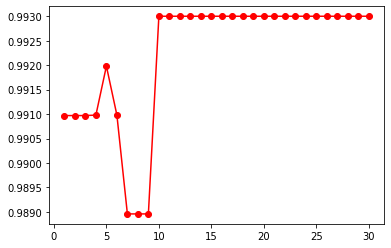

In [14]:
from sklearn.model_selection import cross_val_score

scores = []
for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x_train, y_train,
                            cv=10, scoring='accuracy')
    scores.append(score.mean())

# 교차검증 시각화
x = range(1,31)
plt.plot(x, scores, 'ro-')
plt.show()    

훈련 정확도 0.995987963891675
예측 정확도 0.9953271028037384
[[424   1]
 [  1   2]]
정밀도 0.9953271028037384
재현율 0.9953271028037384


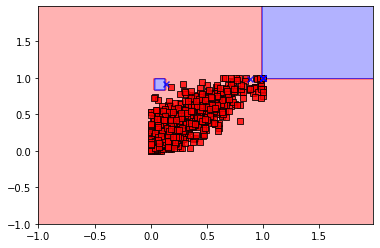

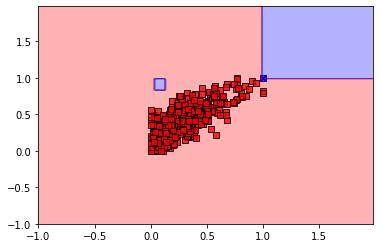

In [15]:
# 부스팅 계열

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

adaclf = AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=3),
            n_estimators=100, learning_rate=0.5,
            algorithm='SAMME.R')

adaclf.fit(x_train, y_train)
print('훈련 정확도', adaclf.score(x_train, y_train))

pred = adaclf.predict(x_test)
print('예측 정확도', accuracy_score(pred, y_test))

print(confusion_matrix(y_test, pred))

print('정밀도', precision_score(pred, y_test, average='weighted'))
print('재현율', recall_score(pred, y_test, average='weighted'))

plot_decision_regions(x_train, y_train, adaclf)
plt.show()

plot_decision_regions(x_test, y_test, adaclf)
plt.show()

In [16]:
adaclf = AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=3),
            n_estimators=100, learning_rate=0.5,
            algorithm='SAMME.R')
adaclf.fit(data, target)

print('훈련정확도', adaclf.score(data, target))

print(confusion_matrix(target, adaclf.predict(data)))

훈련정확도 0.9964912280701754
[[1410    5]
 [   0   10]]


0.995987963891675
0.9929906542056075
[[423   2]
 [  1   2]]
정밀도 0.992222833058457
재현율 0.9929906542056075


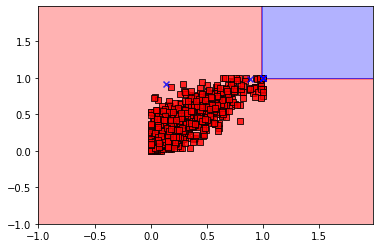

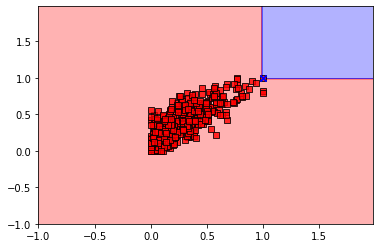

In [17]:
gbclf = GradientBoostingClassifier(
    n_estimators=100, max_depth=3,
    random_state=2001311200)

# 훈련 및 평가, 결정경계 시각화
gbclf.fit(x_train, y_train)
print(gbclf.score(x_train, y_train))

# 예측 및 평가, 결정경계 시각화
pred = gbclf.predict(x_test)
print(accuracy_score(pred, y_test))

print(confusion_matrix(y_test, pred))

print('정밀도', precision_score(pred, y_test, average='weighted'))
print('재현율', recall_score(pred, y_test, average='weighted'))

plot_decision_regions(x_train, y_train, gbclf)
plt.show()

plot_decision_regions(x_test, y_test, gbclf)
plt.show()

In [18]:
gbclf = GradientBoostingClassifier(
    n_estimators=100, max_depth=3,
    random_state=2001311200)
gbclf.fit(data, target)

print('훈련정확도', gbclf.score(data, target))

print(confusion_matrix(target, gbclf.predict(data)))

훈련정확도 0.9964912280701754
[[1410    5]
 [   0   10]]


0.995987963891675
0.9953271028037384
[[424   1]
 [  1   2]]
정밀도 0.9953271028037384
재현율 0.9953271028037384


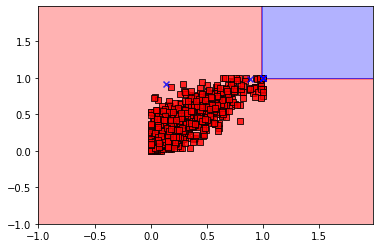

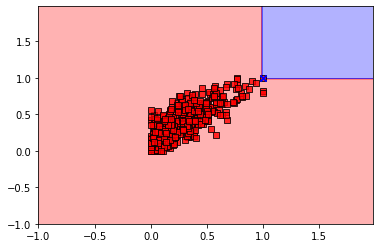

In [19]:
rfcf = RandomForestClassifier()

# 훈련 및 평가, 결정경계 시각화
rfcf.fit(x_train, y_train)
print(rfcf.score(x_train, y_train))

# 예측 및 평가, 결정경계 시각화
pred = rfcf.predict(x_test)
print(accuracy_score(pred, y_test))

print(confusion_matrix(y_test, pred))

print('정밀도', precision_score(pred, y_test, average='weighted'))
print('재현율', recall_score(pred, y_test, average='weighted'))

plot_decision_regions(x_train, y_train, rfcf)
plt.show()

plot_decision_regions(x_test, y_test, rfcf)
plt.show()


In [20]:
rfcf = RandomForestClassifier()
rfcf.fit(data, target)

print('훈련정확도', rfcf.score(data, target))

print(confusion_matrix(target, rfcf.predict(data)))

훈련정확도 0.9964912280701754
[[1410    5]
 [   0   10]]


0.9949849548645938
0.9953271028037384
[[424   1]
 [  1   2]]
정밀도 0.9953271028037384
재현율 0.9953271028037384


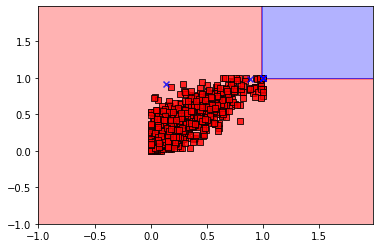

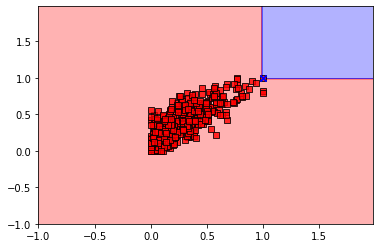

In [21]:
from xgboost import XGBClassifier

xgbclf = XGBClassifier(n_estimators=500,
                       learning_rate=0.1, max_depth=3)
xgbclf.fit(x_train, y_train)
print(xgbclf.score(x_train, y_train))

pred = xgbclf.predict(x_test)
print(accuracy_score(pred, y_test))

print(confusion_matrix(y_test, pred))

print('정밀도', precision_score(pred, y_test, average='weighted'))
print('재현율', recall_score(pred, y_test, average='weighted'))

plot_decision_regions(x_train, y_train, xgbclf)
plt.show()

plot_decision_regions(x_test, y_test, xgbclf)
plt.show()

In [22]:
xgbclf = XGBClassifier(n_estimators=500,
                       learning_rate=0.1, max_depth=3)
xgbclf.fit(data, target)

print('훈련정확도', xgbclf.score(data, target))

print(confusion_matrix(target, xgbclf.predict(data)))

훈련정확도 0.9957894736842106
[[1410    5]
 [   1    9]]


In [23]:
# SVM 분석

from sklearn.svm import SVC

svcl = SVC(kernel='linear', C=1E10, random_state=0)
svcl.fit(x_train, y_train)
pred = svcl.predict(x_test)

# 분석결과 평가
print('훈련 정확도', svcl.score(x_train, y_train))
print('예측 정확도', accuracy_score(y_test, pred))

confusion_matrix(y_test, pred)


훈련 정확도 0.9929789368104313
예측 정확도 0.9929906542056075


array([[425,   0],
       [  3,   0]], dtype=int64)

정밀도 1.0
재현율 0.9929906542056075


C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


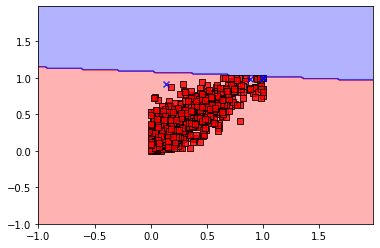

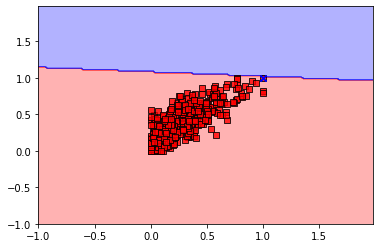

In [24]:
print('정밀도', precision_score(pred, y_test, average='weighted'))
print('재현율', recall_score(pred, y_test, average='weighted'))

plot_decision_regions(x_train, y_train, svcl)
plt.show()

plot_decision_regions(x_test, y_test, svcl)
plt.show()

In [25]:
svcl = SVC(kernel='linear', C=1E10, random_state=0)
svcl.fit(data, target)

print('훈련정확도', svcl.score(data, target))

print(confusion_matrix(target, svcl.predict(data)))

훈련정확도 0.991578947368421
[[1404   11]
 [   1    9]]


In [26]:
svcrb = SVC(kernel='rbf', C=1E5, random_state=0)
svcrb.fit(x_train, y_train)
pred = svcrb.predict(x_test)

# 분석결과 평가
print('훈련 정확도', svcrb.score(x_train, y_train))
print('예측 정확도', accuracy_score(y_test, pred))

confusion_matrix(y_test, pred)

훈련 정확도 0.995987963891675
예측 정확도 0.9953271028037384


array([[424,   1],
       [  1,   2]], dtype=int64)

정밀도 0.9953271028037384
재현율 0.9953271028037384


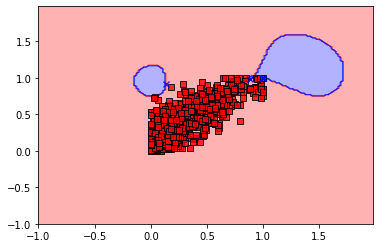

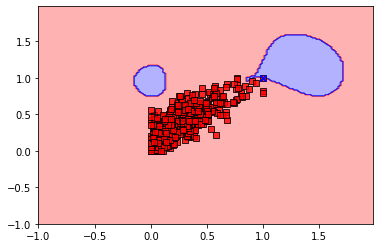

In [27]:
print('정밀도', precision_score(pred, y_test, average='weighted'))
print('재현율', recall_score(pred, y_test, average='weighted'))

plot_decision_regions(x_train, y_train, svcrb)
plt.show()

plot_decision_regions(x_test, y_test, svcrb)
plt.show()

In [28]:
svcrb = SVC(kernel='rbf', C=1E5, random_state=0)
svcrb.fit(data, target)

print('훈련정확도', svcrb.score(data, target))

print(confusion_matrix(target, svcrb.predict(data)))

훈련정확도 0.9957894736842106
[[1409    6]
 [   0   10]]


In [29]:
# 신경망

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[15, 50])
# mlp = MLPClassifier(solver='adam', activation='relu', hidden_layer_sizes=[50])
mlp.fit(x_train, y_train)

pred = mlp.predict(x_test)

# 분석결과 평가
print('훈련 정확도', mlp.score(x_train, y_train))
print('예측 정확도', accuracy_score(y_test, pred))

confusion_matrix(y_test, pred)


훈련 정확도 0.9939819458375125
예측 정확도 0.9929906542056075


array([[425,   0],
       [  3,   0]], dtype=int64)

정밀도 1.0
재현율 0.9929906542056075


C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


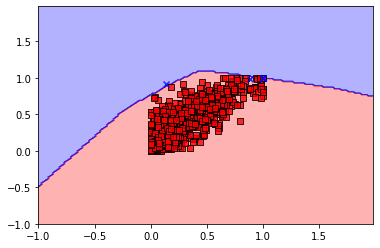

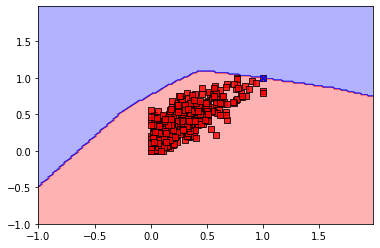

In [30]:
print('정밀도', precision_score(pred, y_test, average='weighted'))
print('재현율', recall_score(pred, y_test, average='weighted'))

plot_decision_regions(x_train, y_train, mlp)
plt.show()

plot_decision_regions(x_test, y_test, mlp)
plt.show()

훈련정확도 0.9929824561403509
[[1415    0]
 [  10    0]]


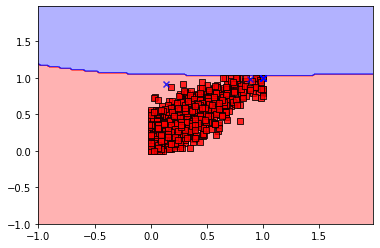

In [31]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[5,10])
mlp.fit(data, target)

print('훈련정확도', mlp.score(data, target))

print(confusion_matrix(target, mlp.predict(data)))

plot_decision_regions(data, target, mlp)
plt.show()